### Project- 1
#### Delivery Time Prediction
Prepared for: ExxpertSCM Thoughtware Training Pvt Ltd.


Guided by:  Mr. Pattabhi Raman


dataset: https://www.kaggle.com/datasets/ranitsarkar01/porter-delivery-time-estimation


Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below

market id: integer id for the market where the restaurant lies

created at: the timestamp at which the order was placed

actual delivery time: the timestamp when the order was delivered

store_primary_category: category for the restaurant

order protocol: integer code value for order protocol(how the order was placed le: through porter, call to restaurant, pre booked, third part etc)

total items subtotal: final price of the order

num_distinct items: the number of distinct items in the order

actual delivery time: the timestamp when the order was delivered

store_primary_category: category for the restaurant

order protocol: integer code value for order protocol(how the order was placed le: through porter, call to restaurant, pre booked, third part etc)

total items subtotal: final price of the order

num_distinct items: the number of distinct items in the order

min_item_price: price of the cheapest item in the order

max_item_price: price of the costliest item in order

total_onshift_partners: number of delivery partners on duty at the time order was placed

total_busy_partners: number of delivery partners attending to other tasks

total outstanding_orders: total number of orders to be fulfilled at the moment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving porter_deliverytime_dataset.csv to porter_deliverytime_dataset.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['porter_deliverytime_dataset.csv']))
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,06-02-2015 22:24,06-02-2015 23:27,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,10-02-2015 21:49,10-02-2015 22:56,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,22-01-2015 20:39,22-01-2015 21:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,03-02-2015 21:21,03-02-2015 22:13,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,15-02-2015 02:40,15-02-2015 03:20,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
data.shape

(197428, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
data.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
created_at,197428,23636,11-02-2015 19:51,49
actual_delivery_time,197421,23756,14-02-2015 03:21,39
store_id,197428,6743,d43ab110ab2489d6b9b2caa394bf920f,937
store_primary_category,192668,74,american,19399


In [ ]:
data.select_dtypes(exclude = ['object']).describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,196441.0,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0
order_protocol,196433.0,2.882352,1.503771,1.0,1.0,3.0,4.0,7.0
total_items,197428.0,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0
subtotal,197428.0,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
num_distinct_items,197428.0,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0
min_item_price,197428.0,686.218470,522.038648,-86.0,299.0,595.0,949.0,14700.0
max_item_price,197428.0,1159.588630,558.411377,0.0,800.0,1095.0,1395.0,14700.0
total_onshift_partners,181166.0,44.808093,34.526783,-4.0,17.0,37.0,65.0,171.0
total_busy_partners,181166.0,41.739747,32.145733,-5.0,15.0,34.0,62.0,154.0
total_outstanding_orders,181166.0,58.050065,52.661830,-6.0,17.0,41.0,85.0,285.0


In [ ]:
data.isnull().values.any()

True

In [ ]:
data.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [ ]:
df = data.drop(['market_id','store_primary_category','store_id','num_distinct_items'],axis = 1)
df.shape

(197428, 10)

In [ ]:
df.isnull().sum()

created_at                      0
actual_delivery_time            7
order_protocol                995
total_items                     0
subtotal                        0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [ ]:
df.dropna(axis = 0,how = 'any', inplace = True)
df.shape

(180242, 10)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [ ]:
#Delivery time
df['delivery_time'] = df['actual_delivery_time'] - df['created_at']

In [ ]:
#Delivery time in minutes
from datetime import timedelta
df['delivery_time'] = df['delivery_time'] /timedelta(minutes=1)
df.drop(['actual_delivery_time','created_at'],inplace=True,axis=1)


df['avg_amt'] = (df['min_item_price'] + df['max_item_price']) / 2
df.drop(['max_item_price','min_item_price'],inplace=True,axis=1)


In [ ]:
df.duplicated().value_counts()

False    180209
True         33
dtype: int64

In [ ]:
# Keep the last occurrence of duplicates
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(180209, 8)

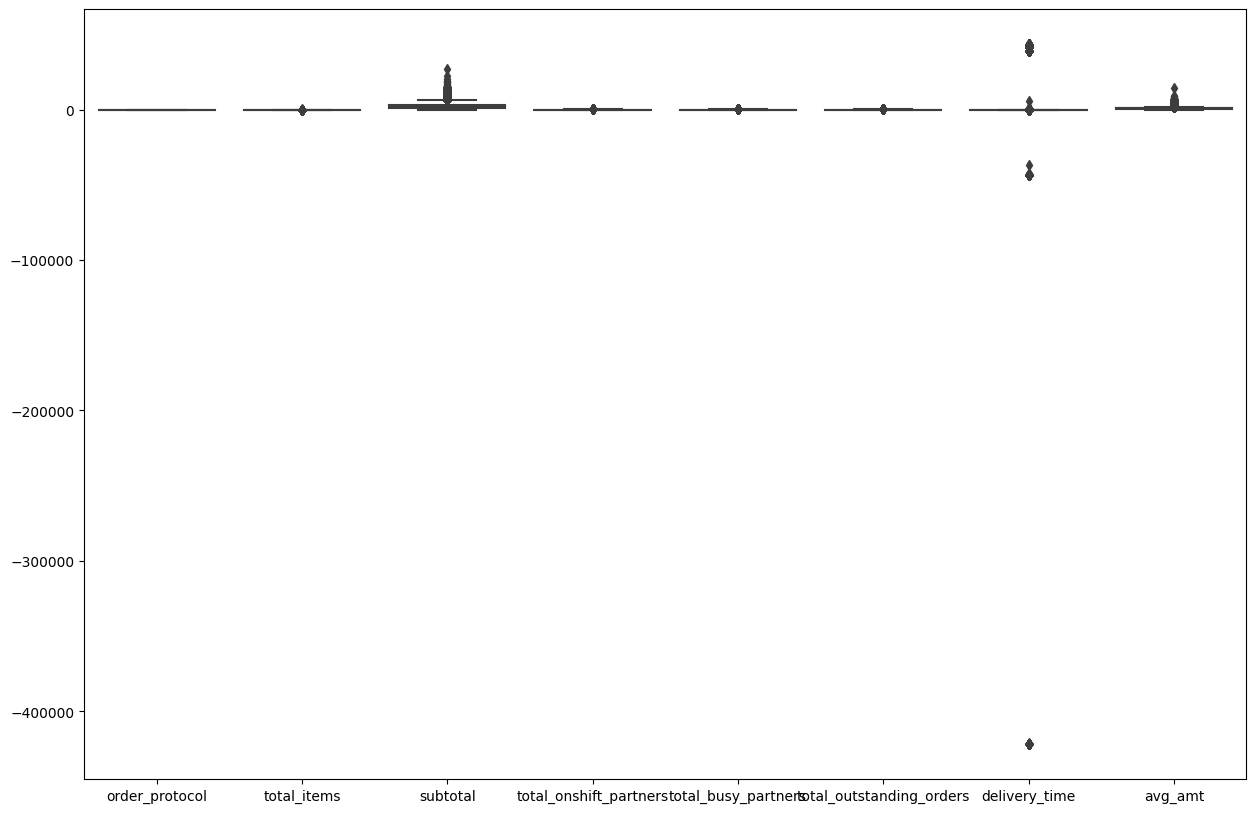

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df)
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize
# handling outliers using winsorize method
for col in df[['delivery_time','avg_amt','subtotal','total_items','total_onshift_partners','total_busy_partners','total_outstanding_orders']]:
    df[col] = winsorize(df[col],limits=[0.01,0.05])

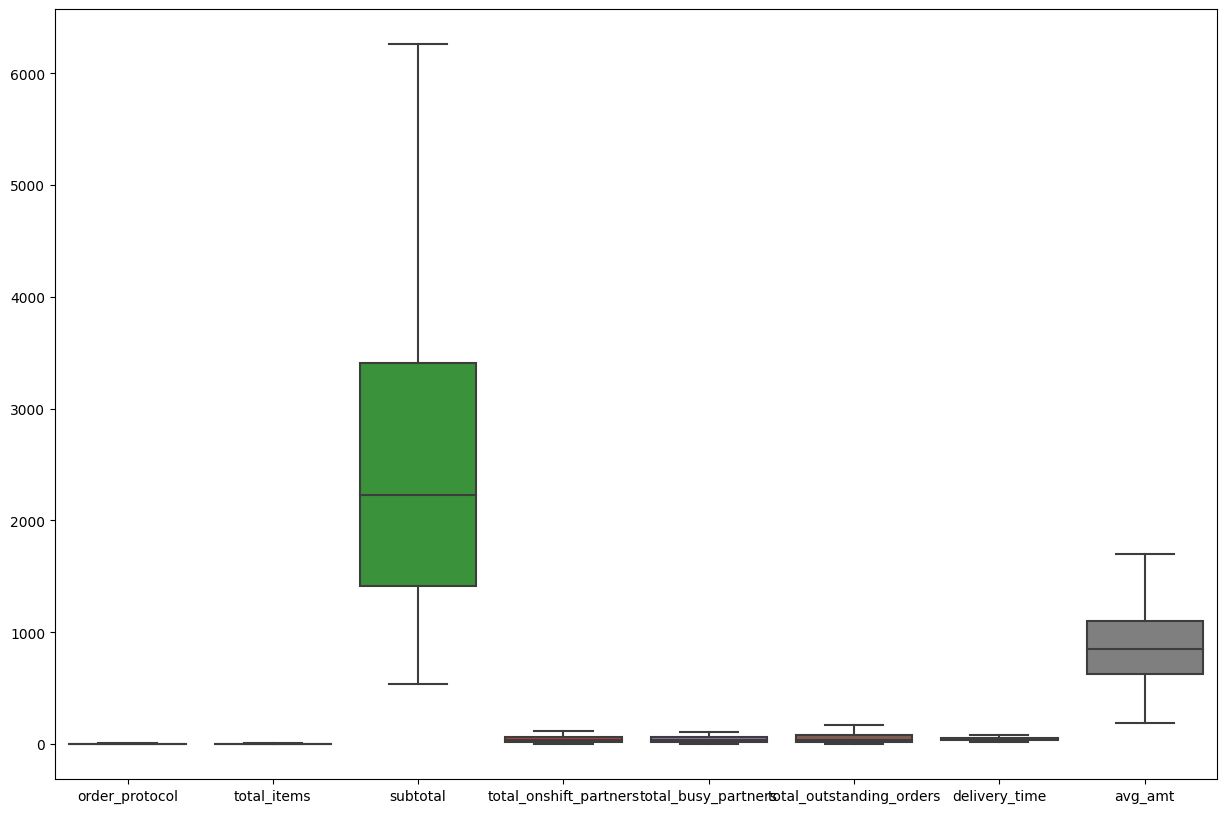

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df)
plt.show()

In [ ]:
df.shape

(180209, 8)

In [ ]:
df.describe()

,order_protocol,total_items,subtotal,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,avg_amt
count,180209.000000,180209.000000,180209.000000,180209.000000,180209.000000,180209.000000,180209.000000,180209.000000
mean,2.895893,3.018745,2603.458068,44.150337,41.097442,56.669334,47.335039,893.922373
std,1.514956,1.757748,1513.532088,32.942325,30.632027,48.993429,16.447852,369.959039
min,1.000000,1.000000,535.000000,0.000000,0.000000,0.000000,19.000000,189.000000
25%,1.000000,2.000000,1415.000000,17.000000,15.000000,17.000000,35.000000,625.000000
50%,3.000000,3.000000,2225.000000,37.000000,34.000000,41.000000,45.000000,847.500000
75%,4.000000,4.000000,3410.000000,65.000000,62.000000,85.000000,57.000000,1100.000000
max,7.000000,7.000000,6260.000000,115.000000,105.000000,169.000000,85.000000,1700.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180209 entries, 0 to 197427
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_protocol            180209 non-null  float64
 1   total_items               180209 non-null  int64  
 2   subtotal                  180209 non-null  int64  
 3   total_onshift_partners    180209 non-null  float64
 4   total_busy_partners       180209 non-null  float64
 5   total_outstanding_orders  180209 non-null  float64
 6   delivery_time             180209 non-null  float64
 7   avg_amt                   180209 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 12.4 MB


<Axes: xlabel='order_protocol', ylabel='count'>

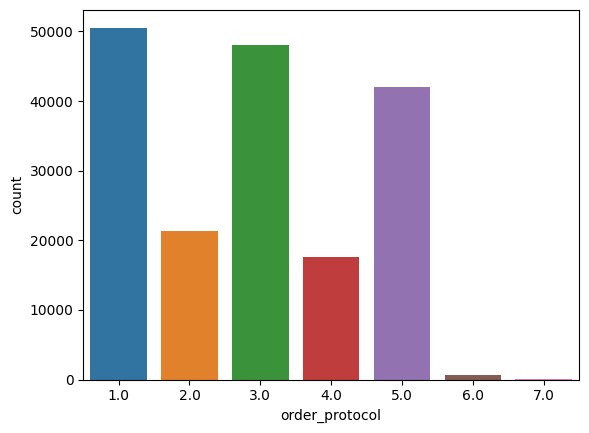

In [ ]:
sns.countplot(x='order_protocol',data=df)

<Axes: >

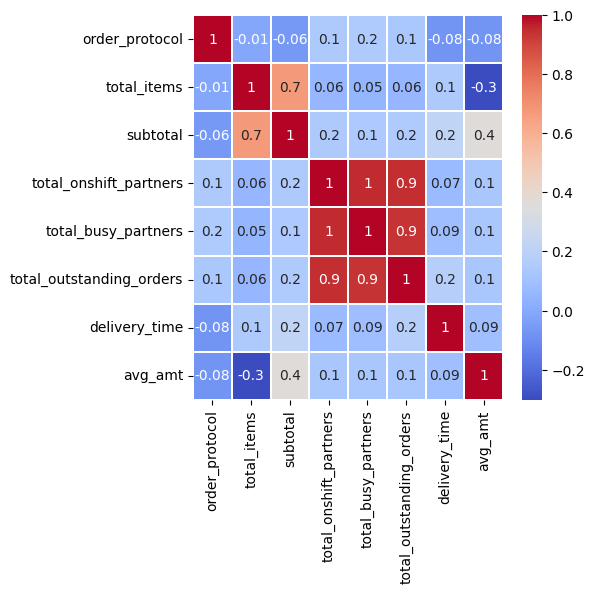

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,linewidths=.3 ,fmt='.1g', cmap= 'coolwarm')

from the heat map it is clear that the columns such as total_onshift_partners, total_busy_partners, total_outstanding_orders and subtotal have high correlation with each other, so multicollinearity is present. since these columns aren't necessary for our model building they can be dropped.  

In [ ]:
df = df.drop(['total_onshift_partners','total_busy_partners','total_outstanding_orders','subtotal'],axis = 1)

In [ ]:
df.shape

(180209, 4)

#### splitting data for validation

In [ ]:
sample_df = df.sample(frac = 0.01,random_state = 1)
sample_df.shape

(1802, 4)

In [ ]:
df = df.drop(sample_df.index)

In [ ]:
df.shape

(178407, 4)

In [ ]:
## feature variables
X = df.drop(['delivery_time'],axis = 1)
## target varibale
y = df['delivery_time']

In [ ]:
#scaling the dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X = ms.fit_transform(X)

#### train test dataset splitting

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
Xtrain.shape

(124884, 3)

In [ ]:
Xtest.shape

(53523, 3)

#### Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
train_lr_pred = lr.predict(Xtrain)
test_lr_pred = lr.predict(Xtest)

In [ ]:
lr_train_rmse = mean_squared_error(ytrain,train_lr_pred,squared = False)
lr_train_rmse

16.046049054082804

In [ ]:
lr_test_rmse = mean_squared_error(ytest,test_lr_pred,squared = False)
lr_test_rmse

16.07799535753204

#### Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth = 3)
rfr.fit(Xtrain,ytrain)
train_rfr_pred = rfr.predict(Xtrain)
test_rfr_pred = rfr.predict(Xtest)

In [ ]:
rfr_train_rmse = mean_squared_error(ytrain,train_rfr_pred,squared = False)
rfr_train_rmse

16.094747299542956

In [ ]:
rfr_test_rmse = mean_squared_error(ytest,test_rfr_pred,squared = False)
rfr_test_rmse

16.128214096425744

#### K neighbors model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(Xtrain,ytrain)
KNN_train_pred = KNN.predict(Xtrain)
KNN_test_pred = KNN.predict(Xtest)

In [ ]:
KNN_train_rmse = mean_squared_error(ytrain,KNN_train_pred,squared = False)
KNN_train_rmse

15.910970978216628

In [ ]:
KNN_test_rmse = mean_squared_error(ytest,KNN_test_pred,squared = False)
KNN_test_rmse

17.25589129628267

In [ ]:
Rmse = pd.DataFrame({'model':["Random forest","Linear regression","K-neighbour"],'Rmse_train':[rfr_train_rmse,lr_train_rmse,KNN_train_rmse],'Rmse_test':[rfr_test_rmse,lr_test_rmse,KNN_test_rmse]})
Rmse

,model,Rmse_train,Rmse_test
0,Random forest,16.094747,16.128214
1,Linear regression,16.046049,16.077995
2,K-neighbour,15.910971,17.255891


from the rmse values of training and testing data it is clear that random forest model or linear regression model is found out to be the good model for predicting the delivery time of porter. for validating the model we choose random forest model and linear regression model.

#### Validating the model

In [ ]:
sample_df

,order_protocol,total_items,delivery_time,avg_amt
33907,3.0,3,50.0,864.0
13397,3.0,4,52.0,1622.5
38703,3.0,2,50.0,1399.0
78585,3.0,2,47.0,419.0
20085,1.0,7,47.0,850.5
...,...,...,...,...
162604,2.0,7,64.0,1358.0
152735,1.0,1,69.0,894.0
8025,2.0,4,48.0,1025.0
46136,3.0,3,37.0,424.0


In [ ]:
sample_df.shape

(1802, 4)

In [ ]:
Xsample = sample_df.drop(['delivery_time'],axis = 1)
ysample = sample_df['delivery_time']

In [ ]:
#scaling the dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
Xsample=ms.fit_transform(Xsample)


In [ ]:
## perdicting using random forest model
pred1 = rfr.predict(Xsample)

## predicting using linear regression model
pred2 = lr.predict(Xsample)


In [ ]:
rmse1 = mean_squared_error(ysample,pred1,squared = False)
rmse1

16.64582745924179

In [ ]:
rmse2 = mean_squared_error(ysample,pred2,squared = False)
rmse2

16.56043720107012

In [ ]:
RMSE = pd.DataFrame({'model':["Random forest","Linear regression"],'Rmse':[rmse1,rmse2]})
RMSE

,model,Rmse
0,Random forest,16.645827
1,Linear regression,16.560437


In [ ]:
sample_df['randomforest_pred'] = pred1
sample_df['linearreg_pred'] = pred2
dff = sample_df[['delivery_time','randomforest_pred','linearreg_pred']]
dff

,delivery_time,randomforest_pred,linearreg_pred
33907,50.0,45.661079,46.748352
13397,52.0,51.425167,53.392758
38703,50.0,47.487540,48.385971
78585,47.0,44.632906,42.111225
20085,47.0,56.517498,55.475620
...,...,...,...
162604,64.0,56.517498,57.893949
152735,69.0,43.971465,45.026860
8025,48.0,51.425167,50.398176
46136,37.0,45.636961,43.931119


from validating the model it can be observed that the linear regression model shows more accuracy than random forest and the predicted and actual values are some what okay for linaer regression prediction.

In [ ]:
df1 = data.copy()

In [ ]:
df1.shape

(197428, 14)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
df1.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [ ]:
df1.dropna(axis = 0,how = 'any', inplace = True)
df1.shape

(176248, 14)

In [ ]:
df1.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
created_at,176248,23385,11-02-2015 19:51,48
actual_delivery_time,176248,23524,14-02-2015 03:21,36
store_id,176248,5645,d43ab110ab2489d6b9b2caa394bf920f,927
store_primary_category,176248,73,american,18223


In [ ]:
df1.select_dtypes(exclude = ['object']).describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,176248.0,2.743747,1.330911,1.0,2.0,2.0,4.0,6.0
order_protocol,176248.0,2.911687,1.512920,1.0,1.0,3.0,4.0,7.0
total_items,176248.0,3.204592,2.673899,1.0,2.0,3.0,4.0,411.0
subtotal,176248.0,2696.498939,1828.922584,0.0,1408.0,2221.0,3407.0,26800.0
num_distinct_items,176248.0,2.674589,1.625558,1.0,1.0,2.0,3.0,20.0
min_item_price,176248.0,684.937730,519.911425,-86.0,299.0,595.0,942.0,14700.0
max_item_price,176248.0,1159.886994,560.784510,0.0,799.0,1095.0,1395.0,14700.0
total_onshift_partners,176248.0,44.905276,34.529394,-4.0,17.0,37.0,65.0,171.0
total_busy_partners,176248.0,41.845434,32.154573,-5.0,15.0,35.0,62.0,154.0
total_outstanding_orders,176248.0,58.206800,52.708344,-6.0,17.0,41.0,85.0,285.0


In [ ]:
df1['actual_delivery_time'] = pd.to_datetime(df1['actual_delivery_time'])
df1['created_at'] = pd.to_datetime(df1['created_at'])
#Delivery time
df1['delivery_time'] = df1['actual_delivery_time'] - df1['created_at']
#Delivery time in minutes
from datetime import timedelta
df1['delivery_time'] = df1['delivery_time'] /timedelta(minutes=1)
df1 = df1.drop(['store_id','actual_delivery_time','created_at'],axis = 1)

df1['avg_amt'] = (df1['min_item_price'] + df1['max_item_price']) / 2
df1.drop(['max_item_price','min_item_price'],inplace=True,axis=1)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   store_primary_category    176248 non-null  object 
 2   order_protocol            176248 non-null  float64
 3   total_items               176248 non-null  int64  
 4   subtotal                  176248 non-null  int64  
 5   num_distinct_items        176248 non-null  int64  
 6   total_onshift_partners    176248 non-null  float64
 7   total_busy_partners       176248 non-null  float64
 8   total_outstanding_orders  176248 non-null  float64
 9   delivery_time             176248 non-null  float64
 10  avg_amt                   176248 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 16.1+ MB


In [ ]:
df1.duplicated().value_counts()

False    176227
True         21
dtype: int64

In [ ]:
# Keep the last occurrence of duplicates
df1 = df1.drop_duplicates()

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.shape

(176227, 11)

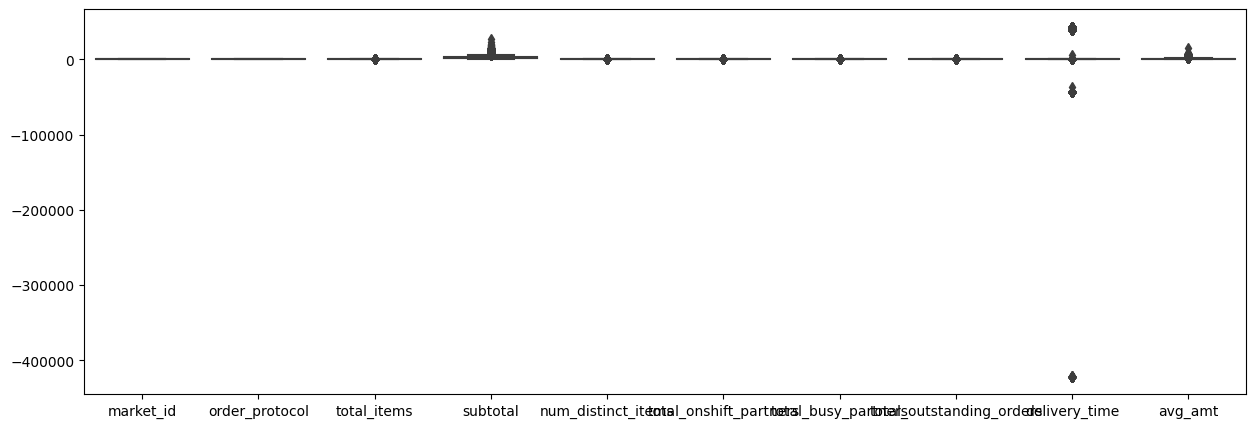

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df1)
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize
# handling outliers using winsorize method
for col in df1[['delivery_time','avg_amt','subtotal','total_items','total_onshift_partners','total_busy_partners','total_outstanding_orders']]:
    df1[col] = winsorize(df1[col],limits=[0.01,0.05])

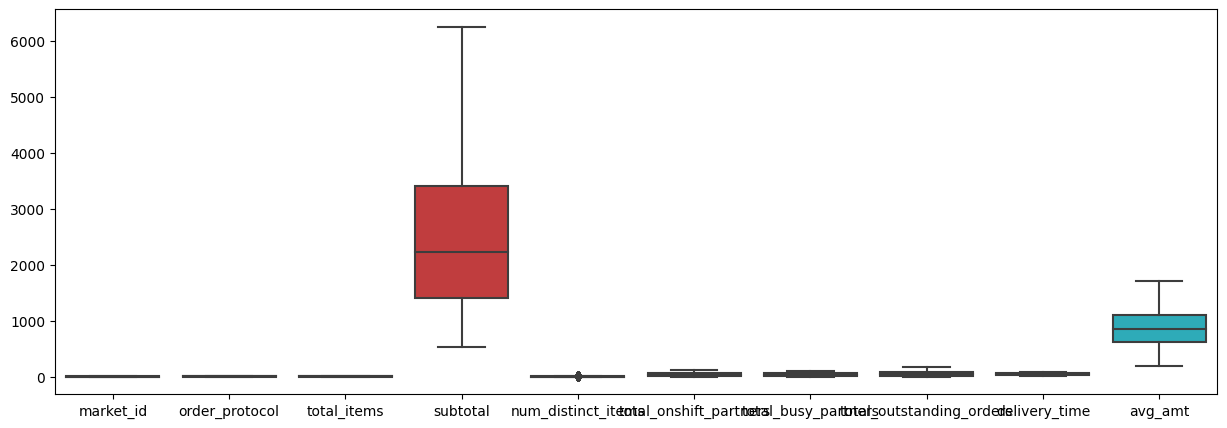

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df1)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df1['store_primary_category'] = le.fit_transform(df1['store_primary_category']).astype('int64')

In [ ]:
sample_df = df1.sample(frac = 0.01,random_state = 1)
sample_df.shape

(1762, 11)

In [ ]:
df1 = df1.drop(sample_df.index)
df1.shape

(174465, 11)

In [ ]:
## feature variables
X = df1.drop(['delivery_time'],axis = 1)
## target varibale
y = df1['delivery_time']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X = pd.DataFrame(pca.fit_transform(X))
print('shape of Xsample new:',X.shape)
print('no.of pca components:',pca.n_components_)
print('explained variance :', pca.explained_variance_ratio_)

shape of Xsample new: (174465, 2)
no.of pca components: 2
explained variance : [0.94953963 0.04850945]


In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
Xtrain.shape

(122125, 2)

In [ ]:
Xtest.shape

(52340, 2)

In [ ]:
#### Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
train_lr_pred = lr.predict(Xtrain)
test_lr_pred = lr.predict(Xtest)

In [ ]:
lr_train_rmse = mean_squared_error(ytrain,train_lr_pred,squared = False)
lr_train_rmse

16.017517941429972

In [ ]:
lr_test_rmse = mean_squared_error(ytest,test_lr_pred,squared = False)
lr_test_rmse

16.07152070654292

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth = 3)
rfr.fit(Xtrain,ytrain)
train_rfr_pred = rfr.predict(Xtrain)
test_rfr_pred = rfr.predict(Xtest)

In [ ]:
rfr_train_rmse = mean_squared_error(ytrain,train_rfr_pred,squared = False)
rfr_train_rmse

16.00715984151822

In [ ]:
rfr_test_rmse = mean_squared_error(ytest,test_rfr_pred,squared = False)
rfr_test_rmse

16.069555473795845

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(Xtrain,ytrain)
KNN_train_pred = KNN.predict(Xtrain)
KNN_test_pred = KNN.predict(Xtest)

In [ ]:
KNN_train_rmse = mean_squared_error(ytrain,KNN_train_pred,squared = False)
KNN_train_rmse

14.162225605617262

In [ ]:
KNN_test_rmse = mean_squared_error(ytest,KNN_test_pred,squared = False)
KNN_test_rmse

17.378922049456058

In [ ]:
Rmse = pd.DataFrame({'model':["Random forest","Linear regression","K-neighbour"],'Rmse_train':[rfr_train_rmse,lr_train_rmse,KNN_train_rmse],'Rmse_test':[rfr_test_rmse,lr_test_rmse,KNN_test_rmse]})
Rmse

,model,Rmse_train,Rmse_test
0,Random forest,16.007160,16.069555
1,Linear regression,16.017518,16.071521
2,K-neighbour,14.162226,17.378922


In [ ]:
sample_df

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,avg_amt
127754,4.0,28,4.0,7,1972,8,8.0,3.0,3.0,19.0,189.0
29084,2.0,7,3.0,2,1490,2,94.0,102.0,140.0,38.0,745.0
140515,1.0,47,1.0,4,4480,4,20.0,15.0,16.0,85.0,1095.0
156602,3.0,66,5.0,2,2000,2,28.0,28.0,38.0,49.0,1000.0
23470,4.0,20,4.0,1,710,1,21.0,18.0,22.0,27.0,710.0
...,...,...,...,...,...,...,...,...,...,...,...
177564,5.0,24,4.0,1,1478,1,22.0,22.0,32.0,55.0,1299.0
169080,5.0,10,2.0,6,4344,4,37.0,31.0,31.0,31.0,724.0
50980,1.0,39,1.0,7,6250,8,29.0,32.0,30.0,79.0,737.5
134854,2.0,58,5.0,1,999,1,22.0,15.0,17.0,20.0,999.0


In [ ]:
sample_df.shape

(1762, 11)

In [ ]:
Xsample = sample_df.drop(['delivery_time'],axis = 1)
ysample = sample_df['delivery_time']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
Xsample = pd.DataFrame(pca.fit_transform(Xsample))
print('shape of Xsample new:',Xsample.shape)
print('no.of pca components:',pca.n_components_)
print('explained variance :', pca.explained_variance_ratio_)

shape of Xsample new: (1762, 2)
no.of pca components: 2
explained variance : [0.94890167 0.04914818]


In [ ]:
## perdicting using random forest model
pred1 = rfr.predict(Xsample)

## predicting using linear regression model
pred2 = lr.predict(Xsample)


In [ ]:
rmse1 = mean_squared_error(ysample,pred1,squared = False)
rmse1

16.18599593498411

In [ ]:
rmse2 = mean_squared_error(ysample,pred2,squared = False)
rmse2

16.17431564815458

In [ ]:
RMSE = pd.DataFrame({'model':["Random forest","Linear regression"],'Rmse':[rmse1,rmse2]})
RMSE

,model,Rmse
0,Random forest,16.185996
1,Linear regression,16.174316


In [ ]:
sample_df['randomforest_pred'] = pred1
sample_df['linearreg_pred'] = pred2
dff1 = sample_df[['delivery_time','randomforest_pred','linearreg_pred']]
dff1

,delivery_time,randomforest_pred,linearreg_pred
127754,19.0,45.842717,45.931357
29084,38.0,44.129523,44.631059
140515,85.0,51.457795,51.725726
156602,49.0,45.895304,45.789296
23470,27.0,42.603892,42.763293
...,...,...,...
177564,55.0,44.658547,44.457070
169080,31.0,51.002049,51.495158
50980,79.0,56.439494,56.073157
134854,20.0,43.074465,43.383115


In [ ]:
dff

,delivery_time,randomforest_pred,linearreg_pred
33907,50.0,45.661079,46.748352
13397,52.0,51.425167,53.392758
38703,50.0,47.487540,48.385971
78585,47.0,44.632906,42.111225
20085,47.0,56.517498,55.475620
...,...,...,...
162604,64.0,56.517498,57.893949
152735,69.0,43.971465,45.026860
8025,48.0,51.425167,50.398176
46136,37.0,45.636961,43.931119
